In [117]:
# Libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Viz
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20,10)

# Stats
import scipy.stats as st
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import norm
from sklearn.preprocessing import LabelEncoder
import sklearn.feature_selection as chi2

# ML
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error 

In [119]:
df = pd.read_csv('/Users/biruk/Documents/Ironhack/Shopping-Trends/shopping_trends_updated.csv')

In [121]:
data = df.copy()

In [123]:
data.shape

(3900, 18)

In [125]:
data.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [127]:
# Column names should be in lower case
data.columns = [x.lower() for x in data.columns]

In [129]:
# White spaces in column names should be replaced by _
data.columns = data.columns.str.replace(' ','_')

In [131]:
# changing a column name
data.rename(columns = {'purchase_amount_(usd)': 'purchase_amount'}, inplace=True)

In [133]:
# change long form gender to short form "M" and "F".
data.replace(to_replace ={'gender': {'Male': 'M', 'Female': 'F'}}, inplace=True)

In [135]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customer_id             3900 non-null   int64  
 1   age                     3900 non-null   int64  
 2   gender                  3900 non-null   object 
 3   item_purchased          3900 non-null   object 
 4   category                3900 non-null   object 
 5   purchase_amount         3900 non-null   int64  
 6   location                3900 non-null   object 
 7   size                    3900 non-null   object 
 8   color                   3900 non-null   object 
 9   season                  3900 non-null   object 
 10  review_rating           3900 non-null   float64
 11  subscription_status     3900 non-null   object 
 12  shipping_type           3900 non-null   object 
 13  discount_applied        3900 non-null   object 
 14  promo_code_used         3900 non-null   

In [137]:
data.duplicated().sum()

0

In [139]:
data.isnull().sum()

customer_id               0
age                       0
gender                    0
item_purchased            0
category                  0
purchase_amount           0
location                  0
size                      0
color                     0
season                    0
review_rating             0
subscription_status       0
shipping_type             0
discount_applied          0
promo_code_used           0
previous_purchases        0
payment_method            0
frequency_of_purchases    0
dtype: int64

In [141]:
data.value_counts('payment_method')

payment_method
PayPal           677
Credit Card      671
Cash             670
Debit Card       636
Venmo            634
Bank Transfer    612
Name: count, dtype: int64

In [143]:
# a frequency table for the product sold based on gender type
freq = pd.crosstab([data.gender],[data.item_purchased], margins=True)
freq.head()

item_purchased,Backpack,Belt,Blouse,Boots,Coat,Dress,Gloves,Handbag,Hat,Hoodie,...,Shirt,Shoes,Shorts,Skirt,Sneakers,Socks,Sunglasses,Sweater,T-shirt,All
gender,,,,,,,,,,,,,,,,,,,,,
F,37,55,66,50,47,52,37,58,52,51,...,59,48,48,49,42,58,56,50,46,1248
M,106,106,105,94,114,114,103,95,102,100,...,110,102,109,109,103,101,105,114,101,2652
All,143,161,171,144,161,166,140,153,154,151,...,169,150,157,158,145,159,161,164,147,3900


In [145]:
# Generate a frequency table for item purchased.
frequency = pd.crosstab(index = data['item_purchased'],
           columns='count')

In [147]:
# sort listed item purchased by number of counts.
top_items = frequency.sort_values(by=['count'], ascending=False)

In [149]:
# top ten best sold items.
top_ten = frequency.nlargest(10, 'count')
top_ten

col_0,count
item_purchased,
Blouse,171
Jewelry,171
Pants,171
Shirt,169
Dress,166
Sweater,164
Jacket,163
Belt,161
Coat,161


<Axes: ylabel='count'>

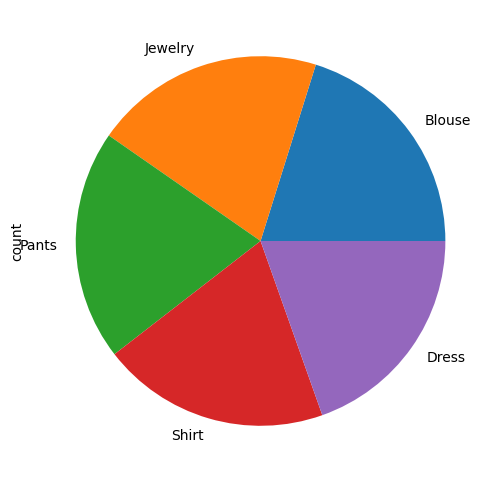

In [151]:
# Visualize best selling using a pie chart. 
plt.figure(figsize = (7, 6))
data['item_purchased'].value_counts().head().plot(kind='pie')

In [153]:
# filter out items which has got 3.0 or higher ratings. Clothing has the most higher rating from all catagories.
filt = data['review_rating'] >= 3.0
data.loc[filt]['category'].value_counts()

category
Clothing       1415
Accessories    1037
Footwear        501
Outerwear       262
Name: count, dtype: int64

In [155]:
# Average customer rating
data['review_rating'].mean()

3.7499487179487176

In [157]:
# counts of different rating
data['review_rating'].value_counts()

review_rating
3.4    182
4.0    181
4.6    174
4.2    171
2.9    170
4.9    166
3.9    163
3.0    162
2.6    159
4.4    158
3.1    157
3.7    156
3.5    156
2.7    154
3.3    152
3.2    152
3.6    149
4.7    148
4.1    148
4.3    147
4.8    144
3.8    142
4.5    139
2.8    136
5.0     68
2.5     66
Name: count, dtype: int64

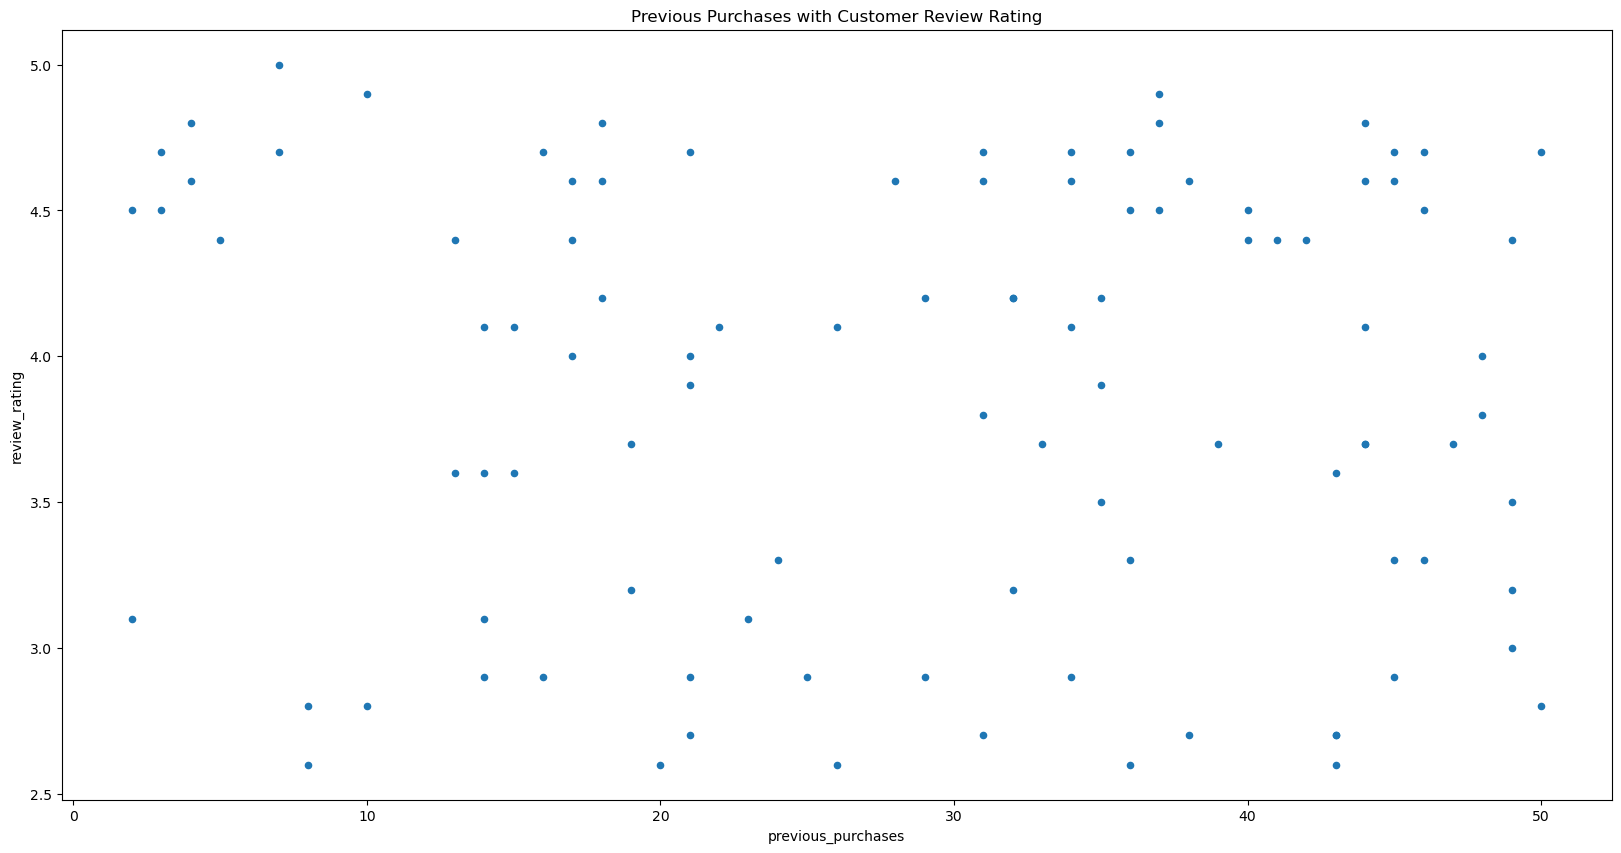

In [159]:
# A Scatter plot showing the ratings from the previous 100 purchases. As we can see, the ratings points are everywhere.
data.head(100).plot(x='previous_purchases', y='review_rating', kind ='scatter')
plt.title('Previous Purchases with Customer Review Rating')
plt.show()

## Measures of Centrality

In [162]:
# Spending based on gender.
data.groupby('gender')['purchase_amount'].agg(['mean', 'sum']).round(3)

,mean,sum
gender,,
F,60.249,75191
M,59.536,157890


In [164]:
# Clothing has recived the highest sum value from all the catagories.
data.groupby('category')['purchase_amount'].agg(['mean','median','sum']).round(2)

,mean,median,sum
category,,,
Accessories,59.84,60.0,74200
Clothing,60.03,60.0,104264
Footwear,60.26,60.0,36093
Outerwear,57.17,54.5,18524


In [166]:
data.describe().round(2)

,customer_id,age,purchase_amount,review_rating,previous_purchases
count,3900.00,3900.00,3900.00,3900.00,3900.00
mean,1950.50,44.07,59.76,3.75,25.35
std,1125.98,15.21,23.69,0.72,14.45
min,1.00,18.00,20.00,2.50,1.00
25%,975.75,31.00,39.00,3.10,13.00
50%,1950.50,44.00,60.00,3.70,25.00
75%,2925.25,57.00,81.00,4.40,38.00
max,3900.00,70.00,100.00,5.00,50.00


In [168]:
# Average sold item based on size.
data.groupby('size')['purchase_amount'].mean().sort_values(ascending=False)

size
S     61.037707
XL    60.090909
M     59.924217
L     58.563153
Name: purchase_amount, dtype: float64

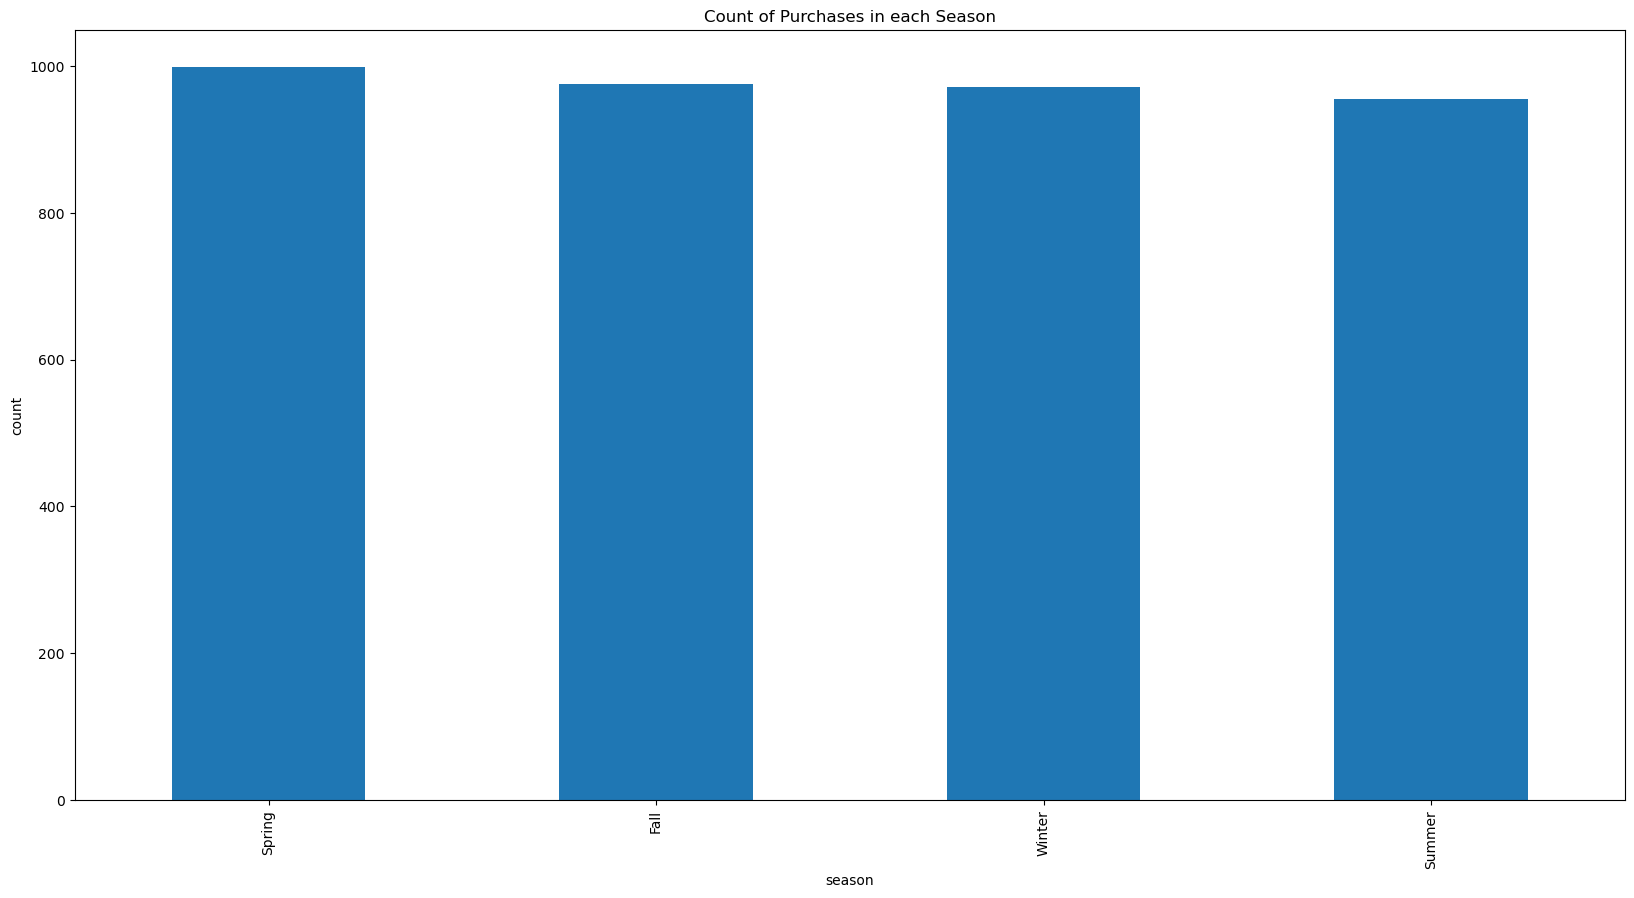

In [170]:
data['season'].value_counts().plot(kind='bar')
plt.xlabel('season')
plt.ylabel('count')
plt.title('Count of Purchases in each Season')
plt.show()

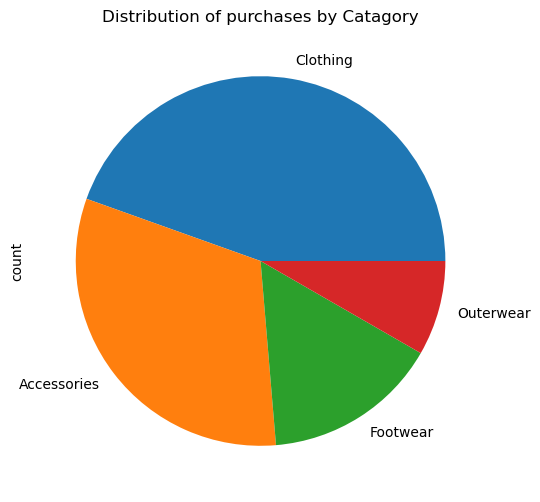

In [172]:
# Vizualize Distribution of purchases by Catagory. Here we can see clothing catagory has a higher number purchased than the rest of items. 
plt.figure(figsize = (8, 6))
data['category'].value_counts().plot(kind = 'pie')
plt.title("Distribution of purchases by Catagory")
plt.show()

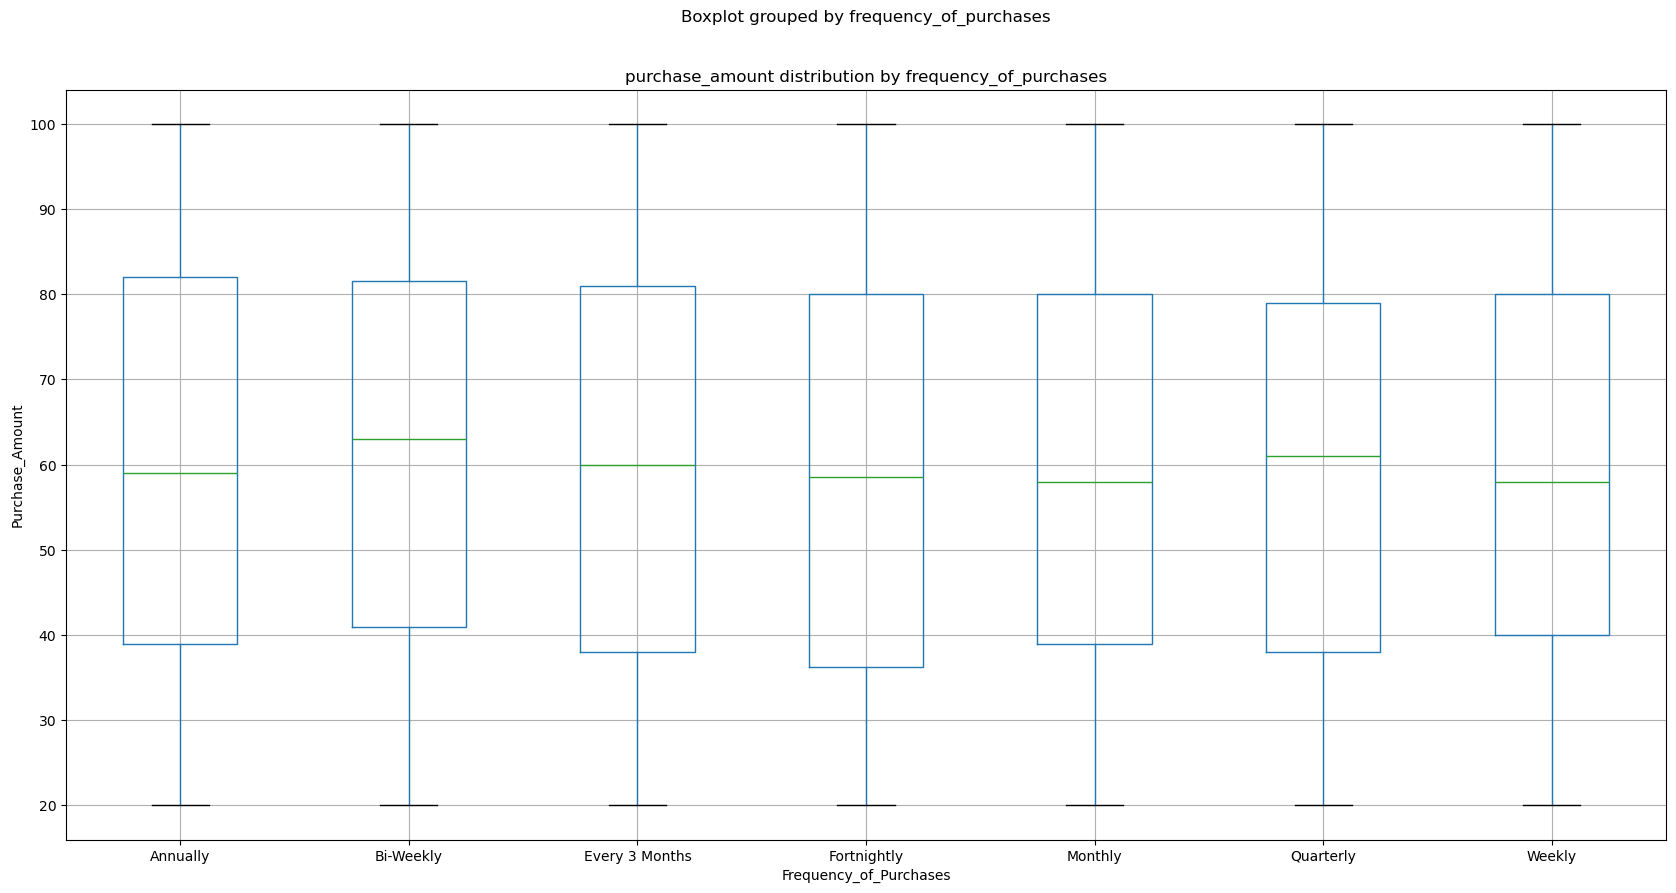

In [174]:
#Based on this boxplot, customers tend to shop more Annually and Bi-Weekly
data.boxplot(column = 'purchase_amount', by= 'frequency_of_purchases')
plt.xlabel('Frequency_of_Purchases')
plt.ylabel('Purchase_Amount')
plt.title('purchase_amount distribution by frequency_of_purchases')
plt.show()

In [176]:
# Types of payment method and thier frequency of usage.
data['payment_method'].value_counts()

payment_method
PayPal           677
Credit Card      671
Cash             670
Debit Card       636
Venmo            634
Bank Transfer    612
Name: count, dtype: int64

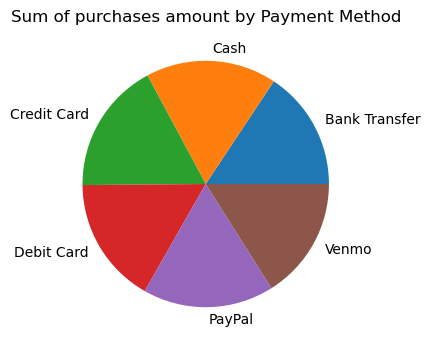

In [178]:
# Distribution of transaction made using each payment method.
plt.figure(figsize = (6, 4))
data.groupby('payment_method')['purchase_amount'].sum().plot(kind='pie')
plt.title("Sum of purchases amount by Payment Method")
plt.ylabel('')
plt.show()

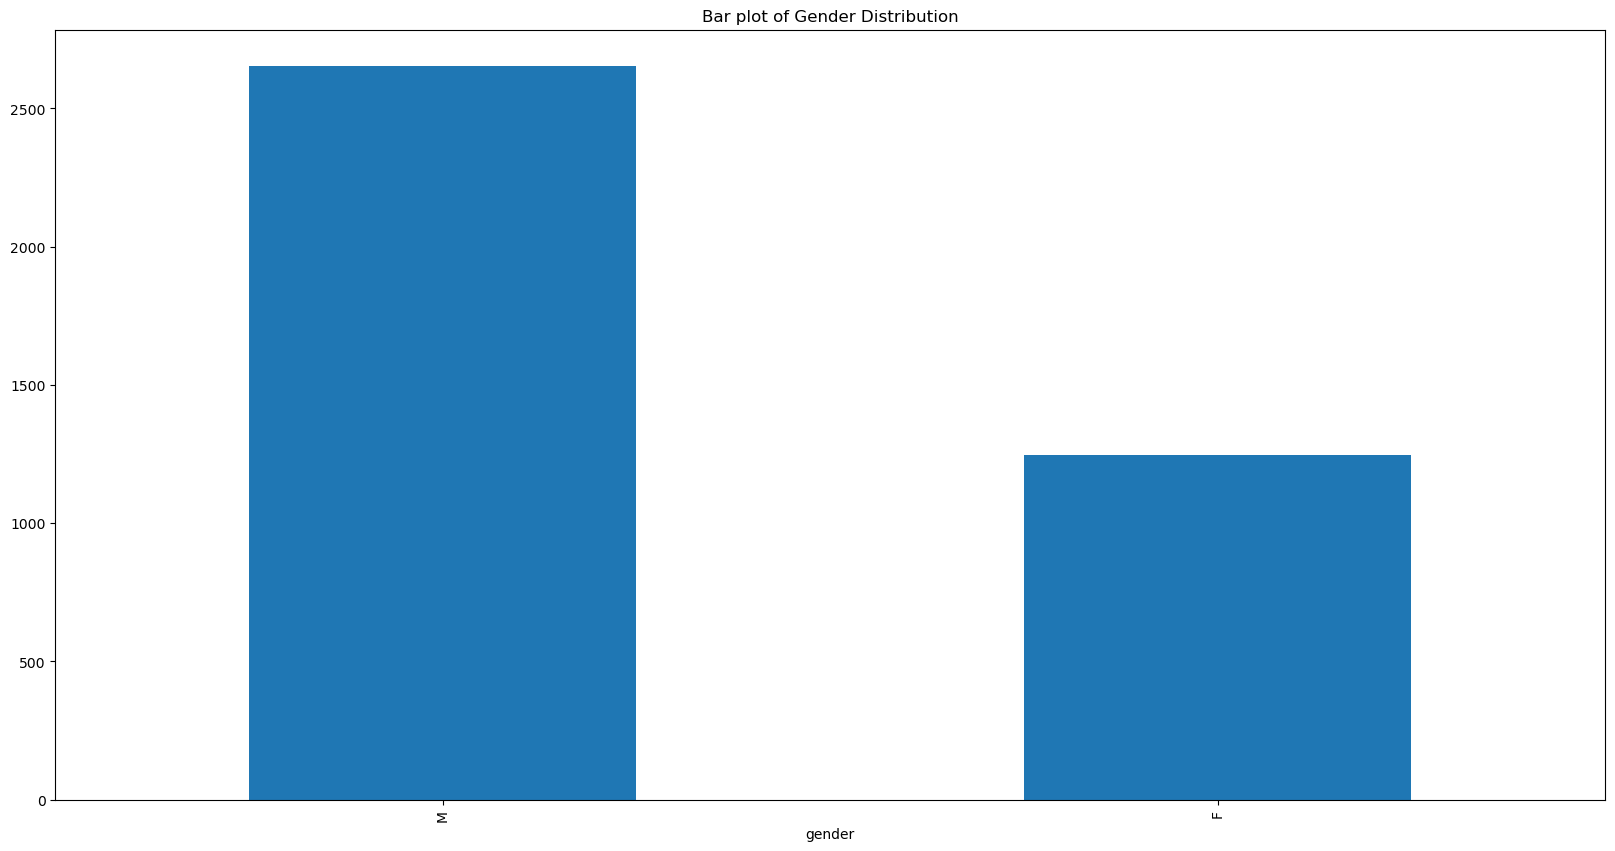

In [180]:
# gender distributions.
data['gender'].value_counts().plot(kind='bar')
plt.title('Bar plot of Gender Distribution')
plt.show()

## Measures of Dispersion

In [183]:
# Determine the Variance
data['purchase_amount'].var()

560.9978060778241

In [185]:
# Determine the Standard Diviation
data['purchase_amount'].std()

23.685392250875307

#### Determine the Range

In [188]:
min = data['purchase_amount'].min()
min

20

In [190]:
max = data['purchase_amount'].max()
max

100

In [192]:
range = max - min
range

80

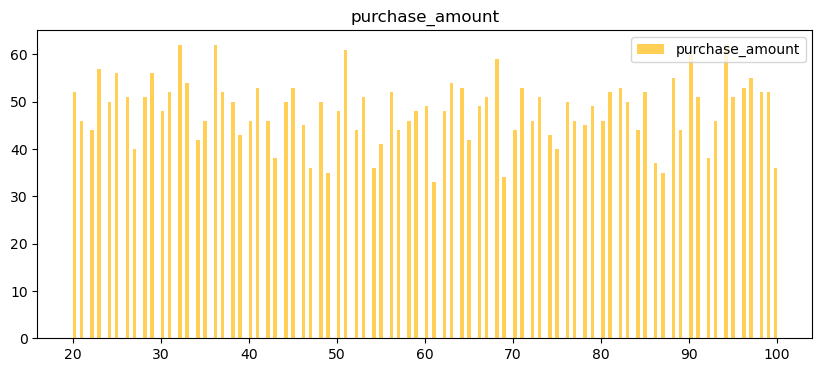

In [194]:
# A histogram to visualize the distribution of product Price range where most products fall. 
# As we can see the distribution is 'Noisy' it could be the sample size is very low.
data.hist(column='purchase_amount',
       grid=False,
       figsize=(10, 4),
       legend=True,
       bins=200,
       # orientation='horizontal',
       color='#FFCF56');

In [195]:
pd.pivot_table(data, values = 'purchase_amount', index = 'location', columns= 'category', aggfunc='mean' ).head()

category,Accessories,Clothing,Footwear,Outerwear
location,,,,
Alabama,63.040000,56.926829,60.933333,54.625000
Alaska,66.115385,67.545455,77.000000,56.500000
Arizona,63.500000,66.531250,78.500000,65.142857
Arkansas,59.807692,65.216216,58.900000,45.166667
California,59.516129,58.297872,60.181818,59.666667


### Product review_rating

In [199]:
# Calculate the mean, median, and mode for the review rating of items.
data['review_rating'].describe()

count    3900.000000
mean        3.749949
std         0.716223
min         2.500000
25%         3.100000
50%         3.700000
75%         4.400000
max         5.000000
Name: review_rating, dtype: float64

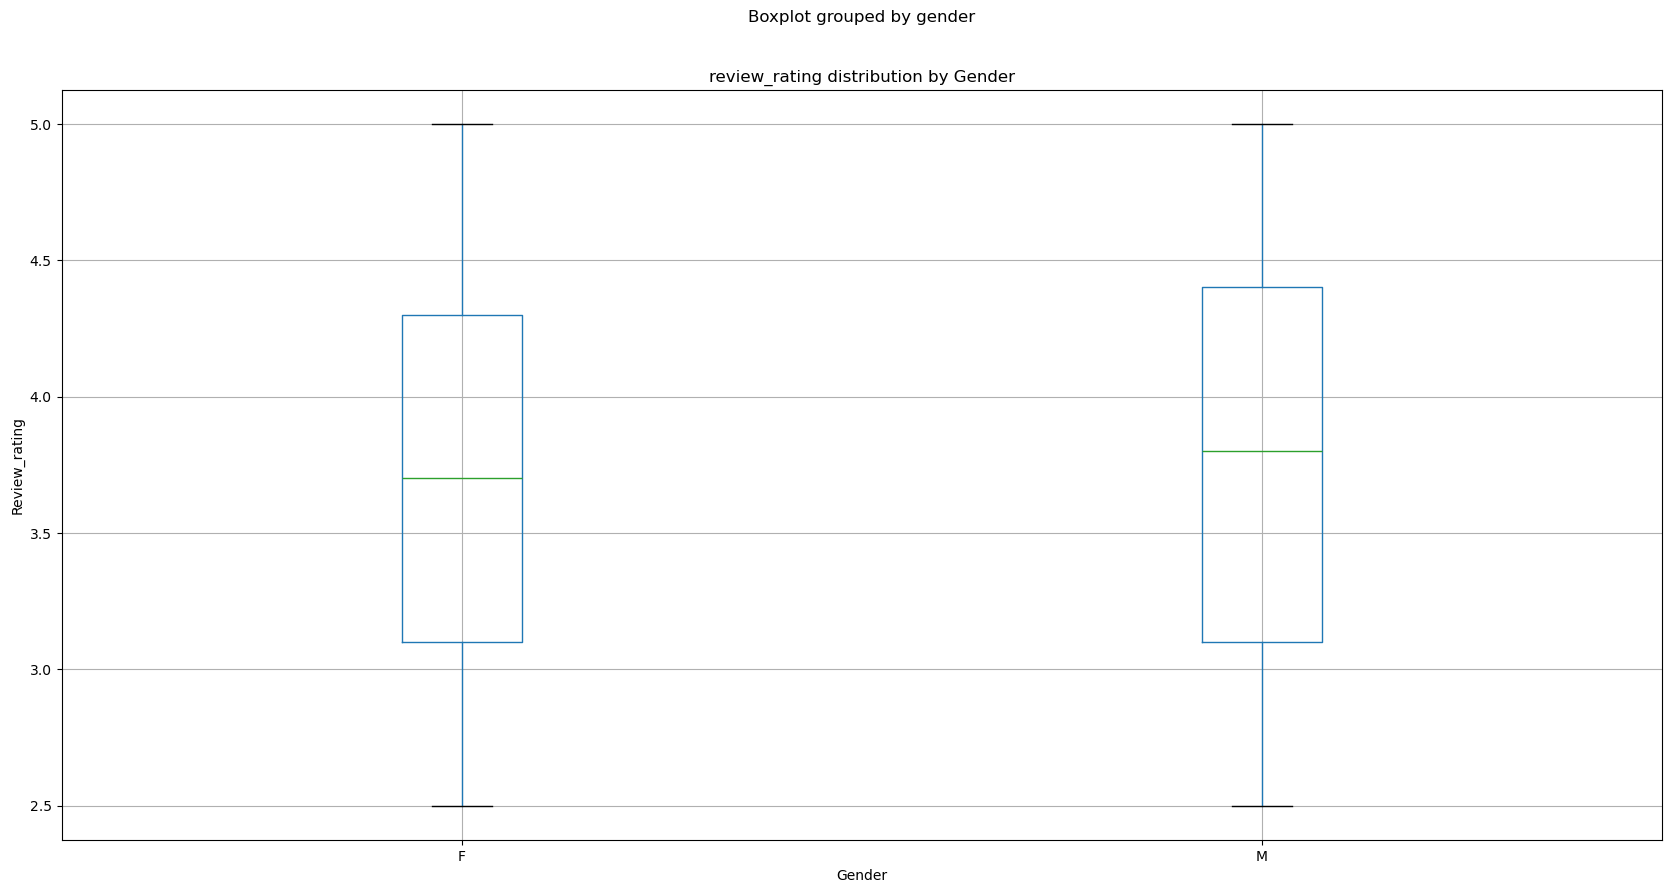

In [201]:
#Based on this boxplot, Male customers are most likely rating slightly more than the Females
data.boxplot(column = 'review_rating', by= 'gender')
plt.xlabel('Gender')
plt.ylabel('Review_rating')
plt.title('review_rating distribution by Gender')
plt.show()

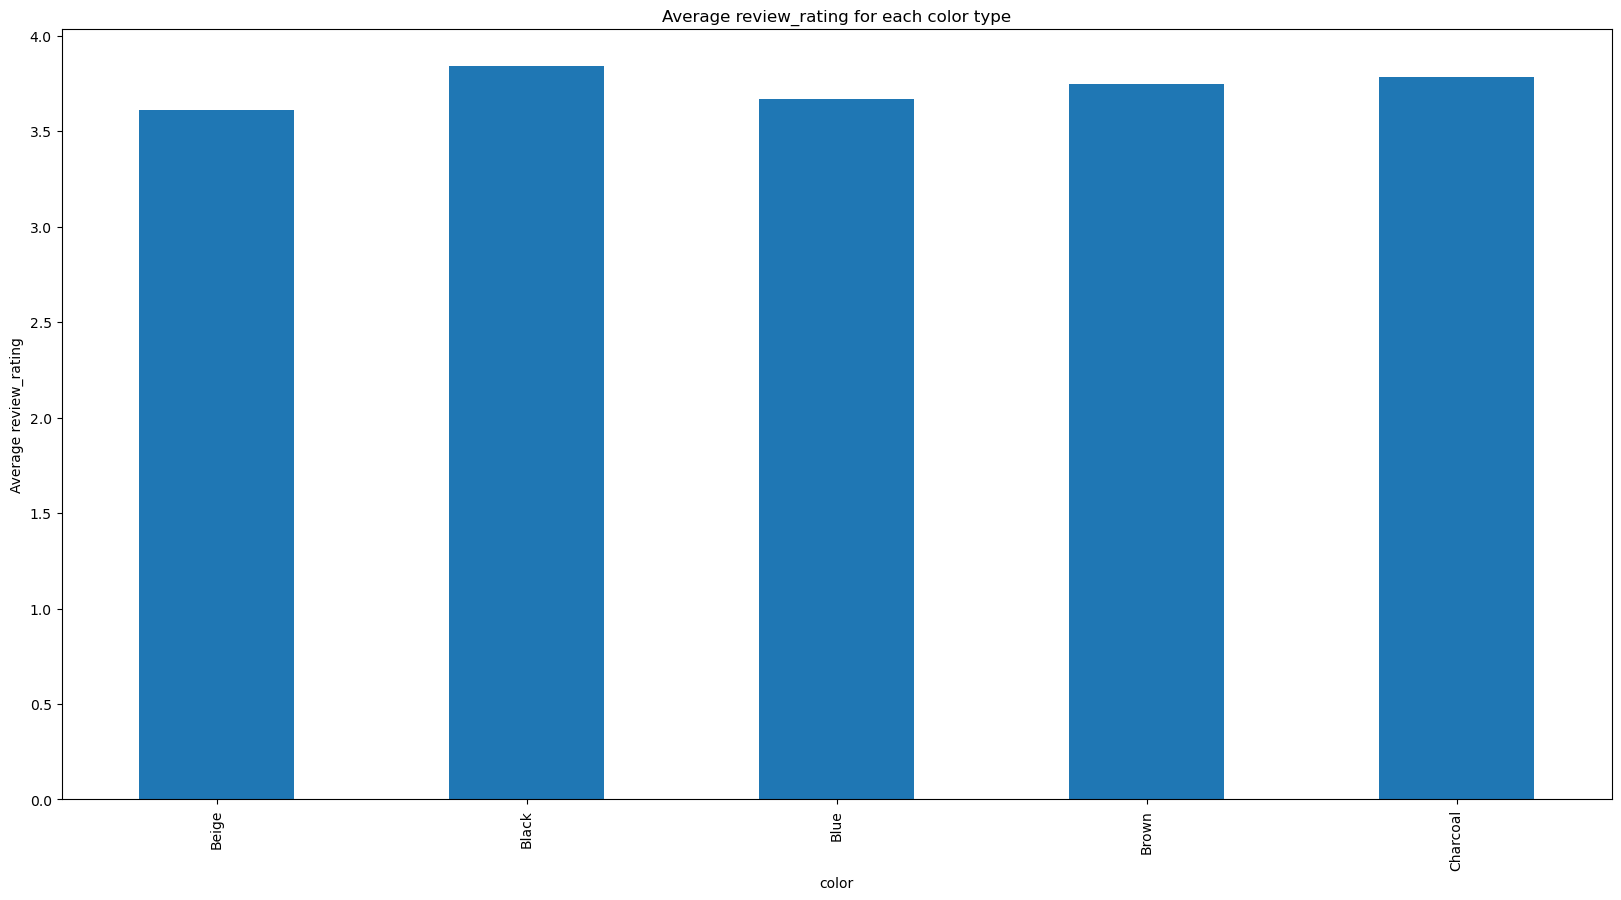

In [203]:
# Average rating based on color type.
data.groupby('color')['review_rating'].mean().head().plot(kind='bar')
plt.xlabel('color')
plt.ylabel('Average review_rating')
plt.title('Average review_rating for each color type')
plt.show()

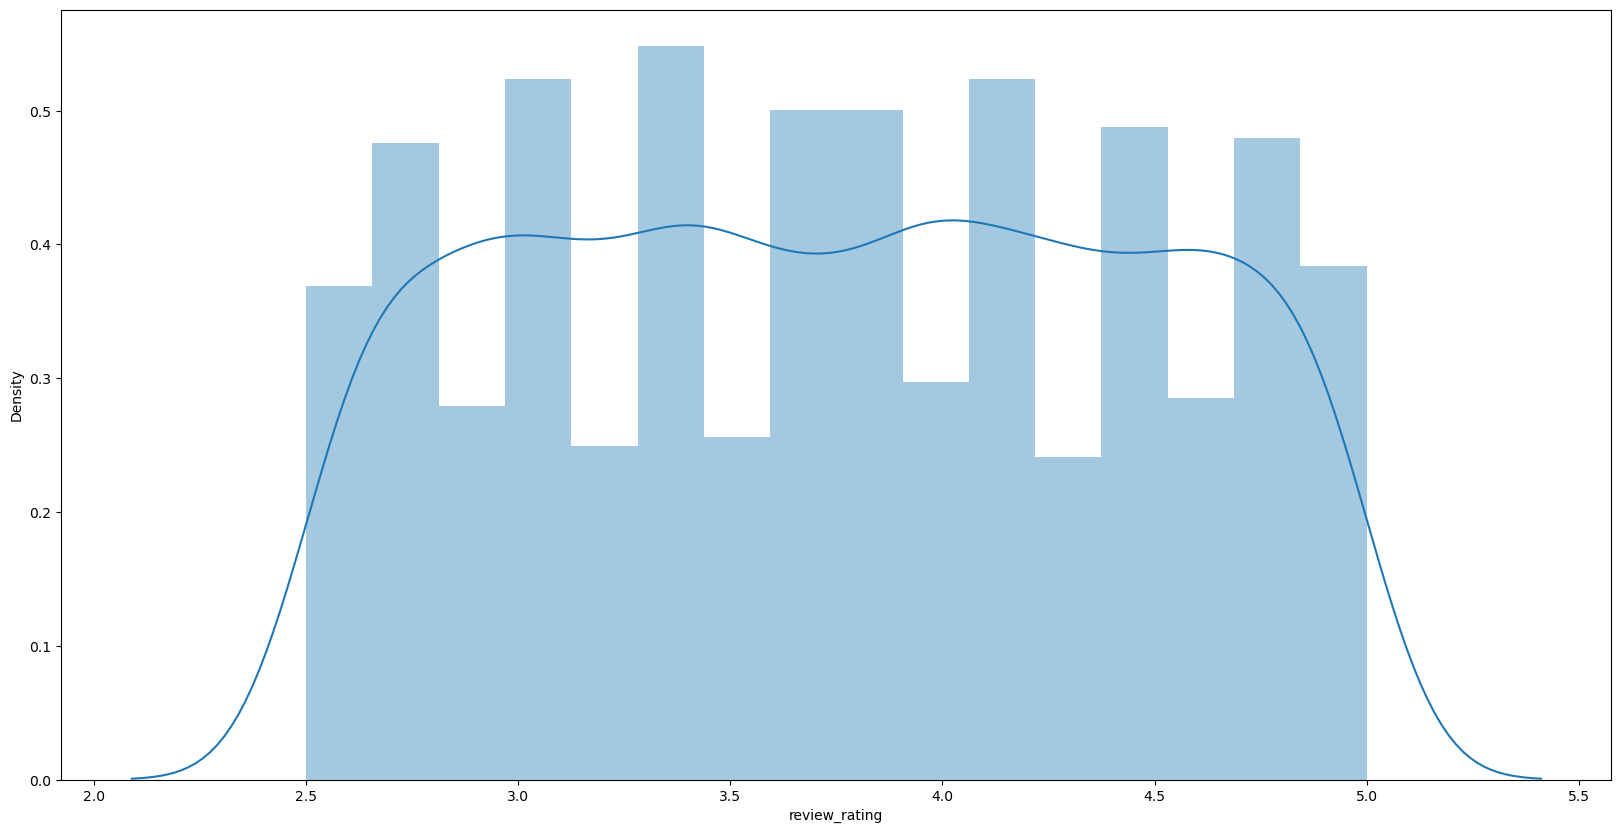

In [205]:
sns.distplot(data['review_rating'], hist = True)
plt.show()

## Feature Selection

### Correlation Matrix

In [209]:
correlation = data[['age', 'review_rating', 'previous_purchases', 'purchase_amount']]
correlation.head()

,age,review_rating,previous_purchases,purchase_amount
0,55,3.1,14,53
1,19,3.1,2,64
2,50,3.1,23,73
3,21,3.5,49,90
4,45,2.7,31,49


In [211]:
corr = correlation.corr()
corr

,age,review_rating,previous_purchases,purchase_amount
age,1.000000,-0.021949,0.040445,-0.010424
review_rating,-0.021949,1.000000,0.004229,0.030776
previous_purchases,0.040445,0.004229,1.000000,0.008063
purchase_amount,-0.010424,0.030776,0.008063,1.000000


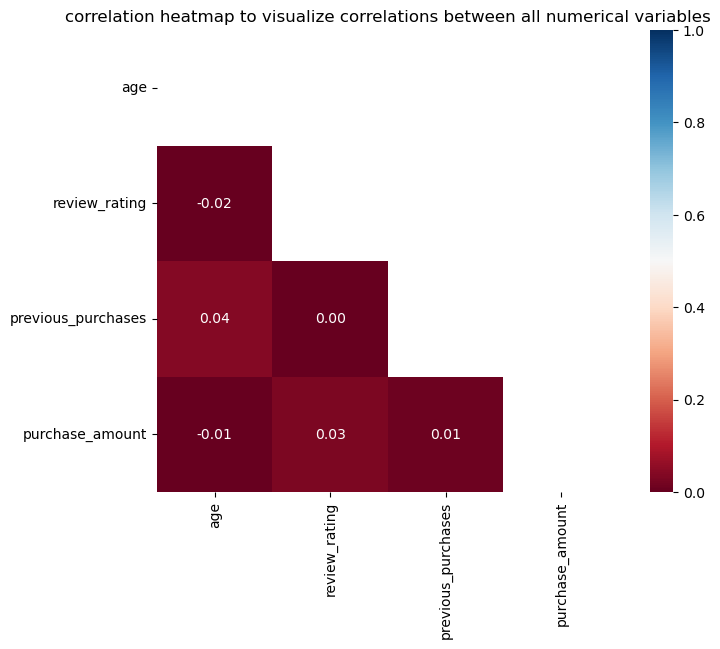

In [213]:
# correlation heatmap to visualize correlations between all numerical variables
my_matrix = correlation.corr(method='spearman').round(2)

my_mask = np.triu(np.ones_like(my_matrix,dtype=bool))
plt.figure(figsize=(8,6))
sns.heatmap(my_matrix, cmap='RdBu', vmin=0, vmax=1,
           annot=True, fmt='0.2f', square=True, mask=my_mask)
plt.title("correlation heatmap to visualize correlations between all numerical variables")
plt.show()

### Inferential Statistical Analysis

#### Chi-Square

In [217]:
# categorical values
chi_test = data[['shipping_type','item_purchased', 'location', 'size', 'season', 'review_rating', 'payment_method','gender', 'frequency_of_purchases']]
chi_test.head()

,shipping_type,item_purchased,location,size,season,review_rating,payment_method,gender,frequency_of_purchases
0,Express,Blouse,Kentucky,L,Winter,3.1,Venmo,M,Fortnightly
1,Express,Sweater,Maine,L,Winter,3.1,Cash,M,Fortnightly
2,Free Shipping,Jeans,Massachusetts,S,Spring,3.1,Credit Card,M,Weekly
3,Next Day Air,Sandals,Rhode Island,M,Spring,3.5,PayPal,M,Weekly
4,Free Shipping,Blouse,Oregon,M,Spring,2.7,PayPal,M,Annually


In [219]:
# Label encoding
for col in chi_test.columns:
    le = LabelEncoder()
    chi_test[col] = le.fit_transform(chi_test[col])
chi_test.head(2)

,shipping_type,item_purchased,location,size,season,review_rating,payment_method,gender,frequency_of_purchases
0,1,2,16,0,3,6,5,1,3
1,1,23,18,0,3,6,1,1,3


In [221]:
from sklearn.feature_selection import chi2

X = chi_test.drop(columns=['frequency_of_purchases'], axis=1)
y = chi_test['frequency_of_purchases']

In [223]:
chi_scores = chi2(X, y)

In [225]:
# The top array is the scores of the chi values. the higher the value is also the higher it's importance of the target variable.
# and the bottom array is the P-values (if the P-value is higher,it is less importance)
chi_scores

(array([ 2.45034363, 12.28153631, 23.13993233,  4.72596024,  2.06332021,
        15.51665121,  8.95129021,  1.25696282]),
 array([8.73983086e-01, 5.59748397e-02, 7.50940848e-04, 5.79409968e-01,
        9.13783846e-01, 1.65973683e-02, 1.76336064e-01, 9.73977718e-01]))

<Axes: >

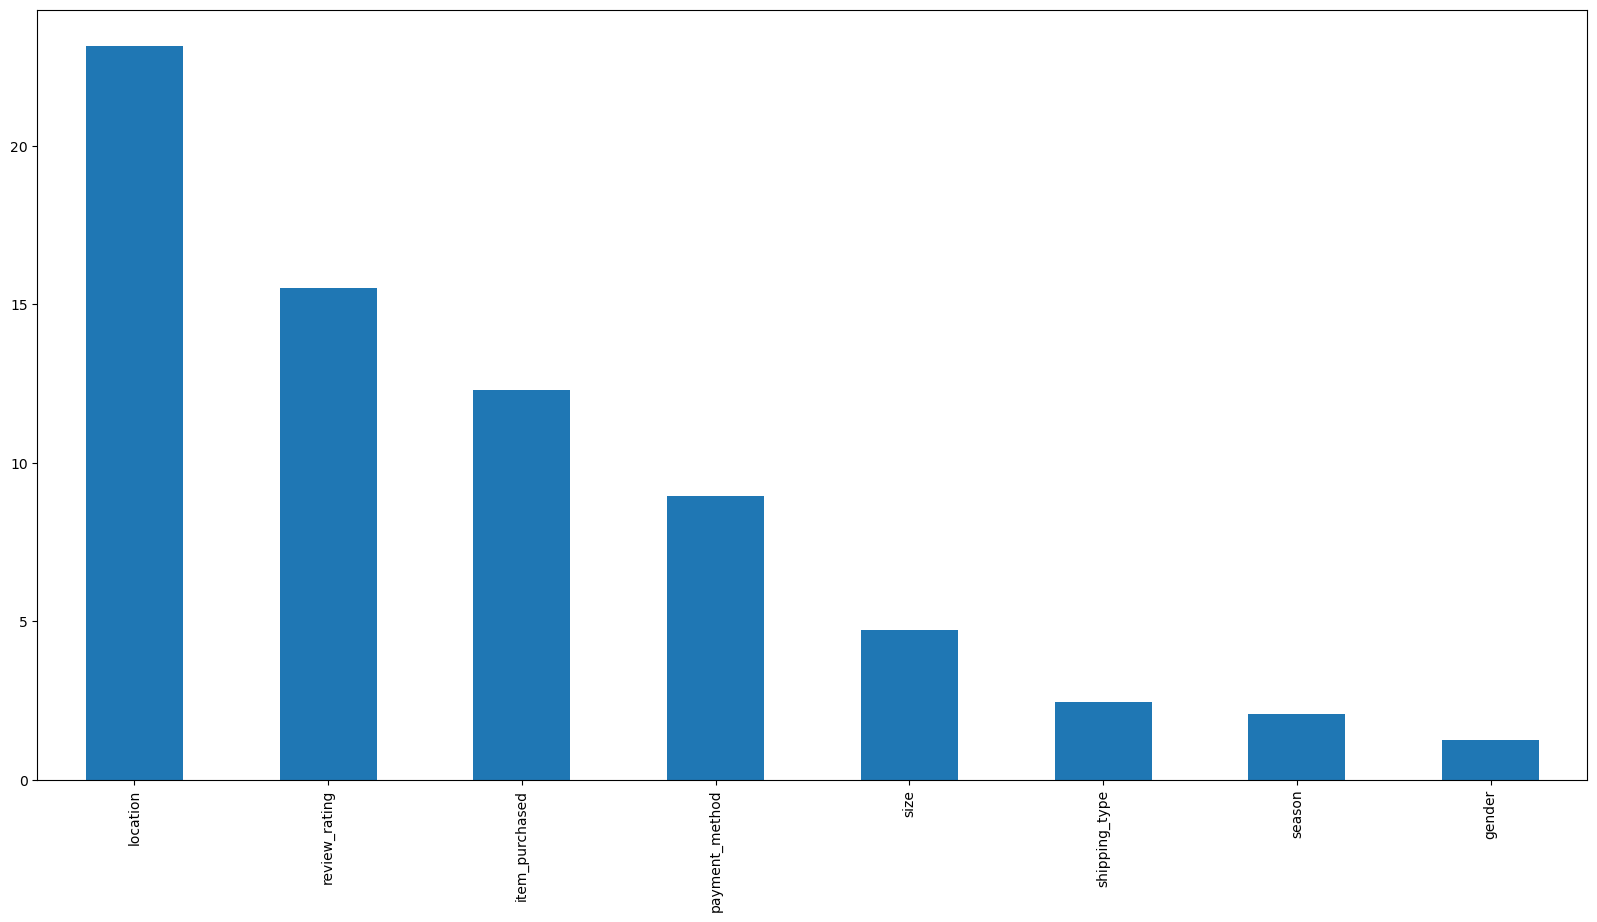

In [227]:
# The Higher the chi values, is also the higher the importance. 
# The top 5 higher attributes should be included in our dataset inorder to get better pridictions.

chi_values = pd.Series(chi_scores[0], index=X.columns)
chi_values.sort_values(ascending=False, inplace=True)
chi_values.plot.bar()

<Axes: >

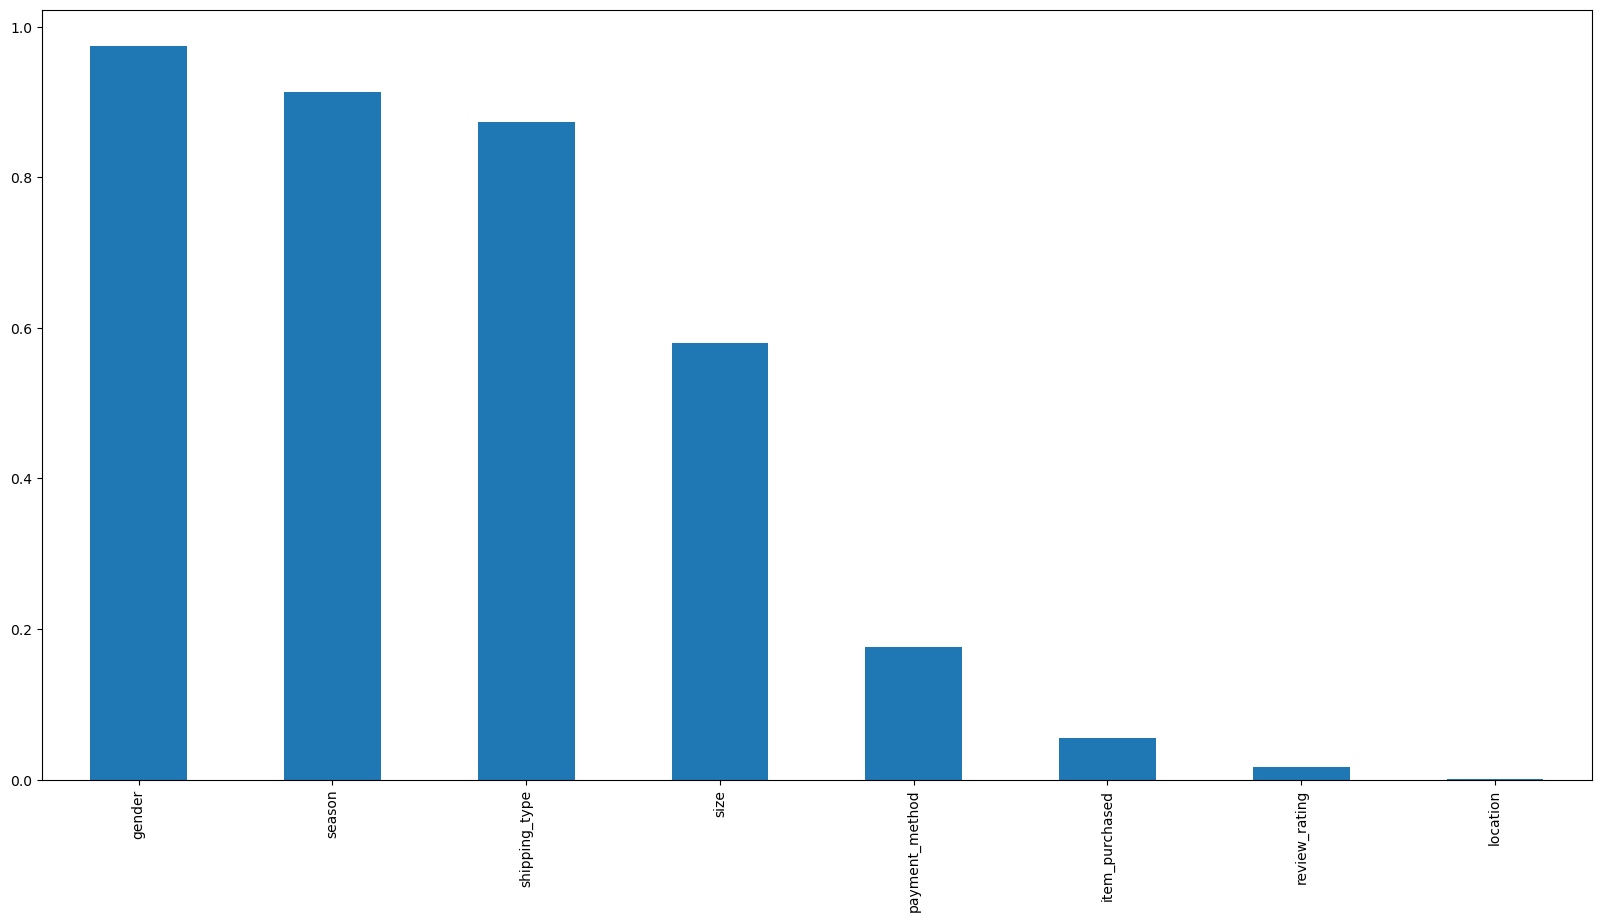

In [229]:
# The P-value for the first 4 bars are > 0.5, thus, we can conclude those are less importance factors. 
p_values = pd.Series(chi_scores[1], index=X.columns)
p_values.sort_values(ascending=False, inplace=True)
p_values.plot.bar()